# (ProsperLoan-Data)
## by (Somto Odenigbo)

## Introduction
> **ProsperLoan-dataset** is an extensively detailed documentation of loan proceedings in the firm. it shows the various requirements and steps it takes to procure a loan from the company prosperLoan.

> **Some specific columns has indicators and the descriptions is as follows:**

>ProsperRating : The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.

> ListingCategory: The category of the listing that the borrower selected when posting their listing: 
0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 
11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 
15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

> LenderYield: The Lender yield on the loan. Lender yield is equal to the interest rate on the loan less the servicing fee.

> **Questions for  the Dataset:**
> - What factors determine borrowers being listed  for a loan?
> - What factors determine a Borrowers Rate?
> - Are investors biased in Loan investments?
> - How does Employment and occupation affect loan status?
> - Are the ratings by prosper affected by employment and occupation status?


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#read the dataset with some columns only into a DataFrame
selected_cols = ['EmploymentStatus', 'BorrowerState', 'Term', 'Occupation',  
                 'ProsperScore', 'IsBorrowerHomeowner', 'ProsperRating (Alpha)',
                 'BorrowerRate', 'BorrowerAPR', 'LoanStatus', 'IncomeRange', 'Investors',
                 'LenderYield', 'DebtToIncomeRatio', 'ListingCategory (numeric)']
Loan = pd.read_csv("prosperLoanData.csv", usecols=selected_cols)

In [3]:
#overview of data shape and compositions
print(Loan.shape)
print(Loan.dtypes)
Loan

(113937, 15)
Term                           int64
LoanStatus                    object
BorrowerAPR                  float64
BorrowerRate                 float64
LenderYield                  float64
ProsperRating (Alpha)         object
ProsperScore                 float64
ListingCategory (numeric)      int64
BorrowerState                 object
Occupation                    object
EmploymentStatus              object
IsBorrowerHomeowner             bool
DebtToIncomeRatio            float64
IncomeRange                   object
Investors                      int64
dtype: object


,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,DebtToIncomeRatio,IncomeRange,Investors
0,36,Completed,0.16516,0.1580,0.1380,NaN,NaN,0,CO,Other,Self-employed,True,0.17,"$25,000-49,999",258
1,36,Current,0.12016,0.0920,0.0820,A,7.0,2,CO,Professional,Employed,False,0.18,"$50,000-74,999",1
2,36,Completed,0.28269,0.2750,0.2400,NaN,NaN,0,GA,Other,Not available,False,0.06,Not displayed,41
3,36,Current,0.12528,0.0974,0.0874,A,9.0,16,GA,Skilled Labor,Employed,True,0.15,"$25,000-49,999",158
4,36,Current,0.24614,0.2085,0.1985,D,4.0,2,MN,Executive,Employed,True,0.26,"$100,000+",20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,36,Current,0.22354,0.1864,0.1764,C,5.0,1,IL,Food Service Management,Employed,True,0.13,"$50,000-74,999",1
113933,36,FinalPaymentInProgress,0.13220,0.1110,0.1010,A,8.0,7,PA,Professional,Employed,True,0.11,"$75,000-99,999",22
113934,60,Current,0.23984,0.2150,0.2050,D,3.0,1,TX,Other,Employed,True,0.51,"$25,000-49,999",119
113935,60,Completed,0.28408,0.2605,0.2505,C,5.0,2,GA,Food Service,Full-time,True,0.48,"$25,000-49,999",274


In [4]:
# descriptive statistics for numeric variable
Loan.describe()

,Term,BorrowerAPR,BorrowerRate,LenderYield,ProsperScore,ListingCategory (numeric),DebtToIncomeRatio,Investors
count,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,113937.000000,105383.000000,113937.000000
mean,40.830248,0.218828,0.192764,0.182701,5.950067,2.774209,0.275947,80.475228
std,10.436212,0.080364,0.074818,0.074516,2.376501,3.996797,0.551759,103.239020
min,12.000000,0.006530,0.000000,-0.010000,1.000000,0.000000,0.000000,1.000000
25%,36.000000,0.156290,0.134000,0.124200,4.000000,1.000000,0.140000,2.000000
50%,36.000000,0.209760,0.184000,0.173000,6.000000,1.000000,0.220000,44.000000
75%,36.000000,0.283810,0.250000,0.240000,8.000000,3.000000,0.320000,115.000000
max,60.000000,0.512290,0.497500,0.492500,11.000000,20.000000,10.010000,1189.000000


In [5]:
Loan.Occupation.nunique()

67

In [6]:
Loan.Occupation.value_counts()

Other                          28617
Professional                   13628
Computer Programmer             4478
Executive                       4311
Teacher                         3759
                               ...  
Dentist                           68
Student - College Freshman        41
Student - Community College       28
Judge                             22
Student - Technical School        16
Name: Occupation, Length: 67, dtype: int64

In [7]:
#rename coloumns
Loan.rename({'ProsperRating (Alpha)':'ProsperRating', 'ListingCategory (numeric)':'ListingCategory', 
             'IsBorrowerHomeowner':'HomeOwner'},
           axis = 'columns', inplace=True)

In [8]:
#Changing dtypes from integer to category
Loan.Term = Loan.Term.astype(str)

In [9]:
#high-level check for missing values
print(Loan.Occupation.isnull().sum())
print(Loan.ProsperScore.isnull().sum())
print(Loan.ProsperRating.isnull().sum())
print(Loan.BorrowerAPR.isnull().sum())
print(Loan.EmploymentStatus.isnull().sum())
print(Loan.DebtToIncomeRatio.isnull().sum())
print(Loan.BorrowerState.isnull().sum())

3588
29084
29084
25
2255
8554
5515


In [10]:
#eliminating missing values
Loan.dropna(subset=['Occupation', 'ProsperScore', 'ProsperRating', 'BorrowerAPR','EmploymentStatus',
                   'DebtToIncomeRatio', 'BorrowerState'], how='any', inplace=True)

In [11]:
#overview and structure
#print new structure
print(Loan.shape)
print(Loan.dtypes)

(76224, 15)
Term                  object
LoanStatus            object
BorrowerAPR          float64
BorrowerRate         float64
LenderYield          float64
ProsperRating         object
ProsperScore         float64
ListingCategory        int64
BorrowerState         object
Occupation            object
EmploymentStatus      object
HomeOwner               bool
DebtToIncomeRatio    float64
IncomeRange           object
Investors              int64
dtype: object


### What is the structure of your dataset?

> Oringinally at 113937rows and 15 columns, after wrangling howerver, the data was brought down to 76224 rows with 15 featured columns(EmploymentStatus, BorrowerState, Term, Occupation, ProsperScore, IsBorrowerHomeowner, ProsperRating (Alpha), BorrowerRate, BorrowerAPR, LoanStatus, IncomeRange, Investors, LenderYield, DebtToIncomeRatio, ListingCategory (numeric)) Most variables are numeric in nature and some are numeric by description eg: ListingCategory (numeric).


### What is/are the main feature(s) of interest in your dataset?

> The main features of the data are: 
>- ProsperRating
>- BorrowerRate
>- Investors

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Some features that will support the analysis and investigation are;
> - Homeowner
> - DebtToIncomeRatio
> - IncomeRange

## Univariate Exploration

In [12]:
#define a function to ease categorical plotting
base_color = sns.color_palette()[0]
def count_p(var, color, title):
    sns.countplot(data= Loan, y= var, color= base_color)
    plt.title(title)
    plt.show()

### For What reasons are Loan Requested?

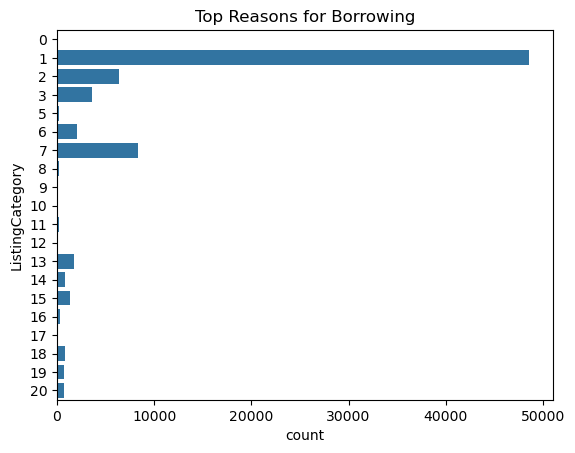

In [13]:
count_p('ListingCategory', base_color, 'Top Reasons for Borrowing');

> The category of the listing that the borrower selected when posting their listing: 
0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 
11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 
15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans.

> The top 4 reasons borrowers request a loan and a listed for are; *debt consolidation*, *other*, *home improvement*, *business*

### What is the Status of a majority of Loans given?

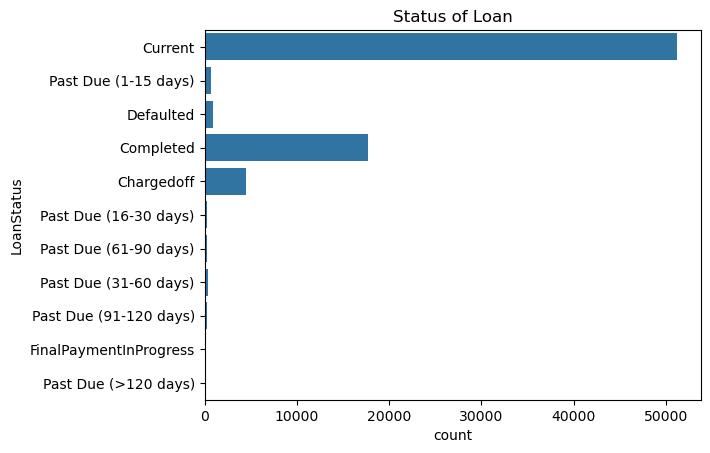

In [14]:
count_p('LoanStatus', base_color, 'Status of Loan');

> Most of the loans in the set are Current ie: more than 50,000 are current and about 39000 are completed

In [15]:
Loan['Investors'].value_counts()

1      24664
2       1125
3        802
4        631
5        552
       ...  
888        1
563        1
779        1
559        1
618        1
Name: Investors, Length: 681, dtype: int64

### What is the account of investors in an individual Loan?

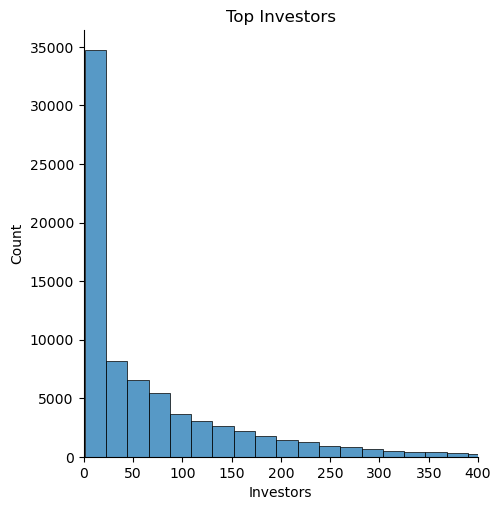

In [16]:
# plot a standard histogram with bin edges to depict the data appropriately
sns.displot(data=Loan, x='Investors', bins=55);
plt.xlim(0,400);
plt.title('Top Investors');

> The number of investors vary from 1 to greater than 400 but it can be particulaly noted that majority of Loans was funded by 1 investor rising to 30 per loans.

### What is the Borrower's rating/counts for the various prosper scores?

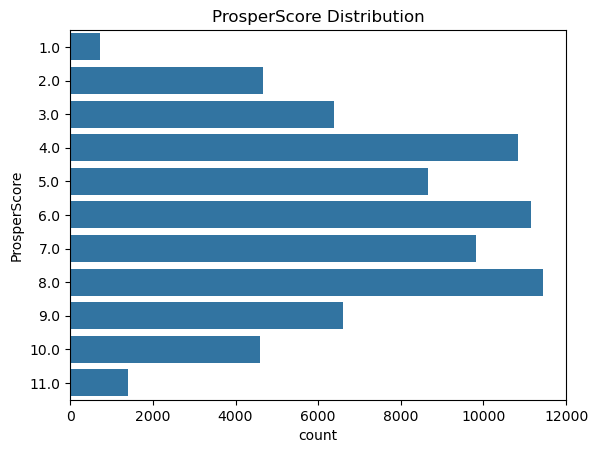

In [17]:
count_p('ProsperScore', base_color, 'ProsperScore Distribution');

> A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score. The Prosperscore 4, 6, 8 are the highest counts with customers.**

> - 1 - < 2000
> - 2 - 5800
> - 3 - 7800
> - 4 - > 12000
> - 5 - 9800
> - 6 - 12000
> - 7 - > 10000
> - 8 - 11800
> - 9 - > 6000
> - 10 - > 4000

> it can be noted that the custormers with the higest scores are slightly above the 4000 mark and also, the number of customers with Prosperscore 4 are the most in this case. it is a good score but below average.
> - 11 - < 2000

> There is another score though in this scaling with some customers having the 11 point mark. this can tend to be the *Legends* in the customer scales which can mean execution of Loan request speedily 



## What interest rate is being paid the most by customers?

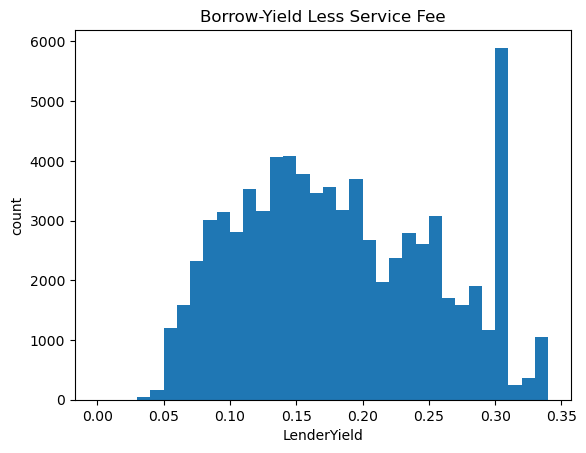

In [18]:
# sorting the bins
bins= np.arange(0, Loan['LenderYield'].max()+0.01, 0.01);
# plot a standard histogram with label
plt.hist(data=Loan, x= 'LenderYield', bins=bins)
plt.xlabel('LenderYield')
plt.ylabel('count')
plt.title('Borrow-Yield Less Service Fee');

> The Lender yield on the loan. Lender yield is equal to the interest rate on the loan less the servicing fee.

 > A range of 0.3% interest rate is being paid the most by customers approximately greater than 7000 of the customers.

### What is the interest rate paid by customers?

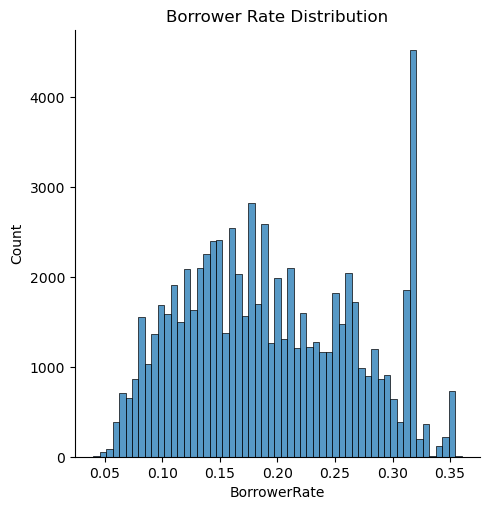

In [19]:
#plot a histogram to depict data
sns.displot(data = Loan, x= 'BorrowerRate')
plt.title('Borrower Rate Distribution');

> The Borrower Rate distribution by customers ranges from 0.05 - 0.35. customers pay a rate of 0.34 percent on loans the most.

### What is the annual percentage rate for the customers?

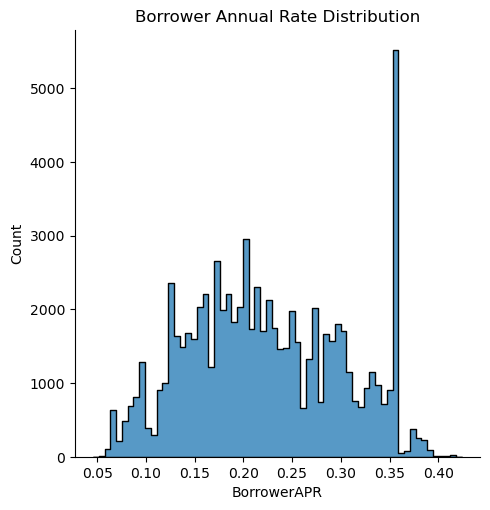

In [20]:
#plot a standard histogram
sns.displot(data= Loan, x= 'BorrowerAPR', multiple='stack', element='step')
plt.title('Borrower Annual Rate Distribution');

> The APR for customers range from .0 to  0.5 with the customers having a high APR of about 0.35% at 6000

### How are customers rated on the Prosper - scale?

In [21]:
#convert the 'ProsperRating' column into an order categorical type
ProsperRate= ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
#Returns the ratings for prosper with the categories and orderedness
ProsperRatings = pd.api.types.CategoricalDtype(ordered=True, categories=ProsperRate)

Loan['ProsperRating'] = Loan['ProsperRating'].astype(ProsperRatings);


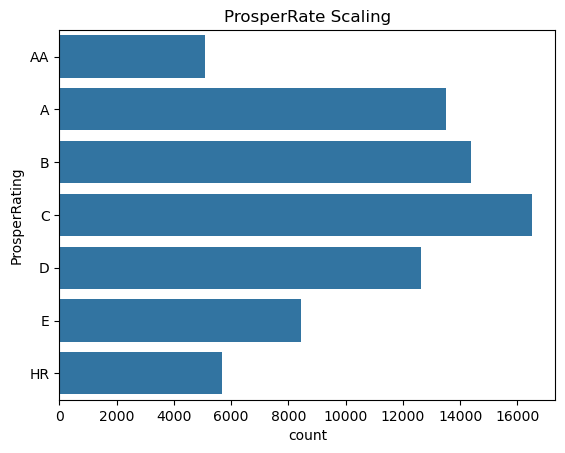

In [22]:
count_p('ProsperRating', base_color, 'ProsperRate Scaling')

> The  Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA.
>- The Prosper rate AA which is the best rate is of the lowest count with the customers and it appears that most customers fall under the rate `C` havig a high count of above 17500

### What is the current status of occupation of borrowers?

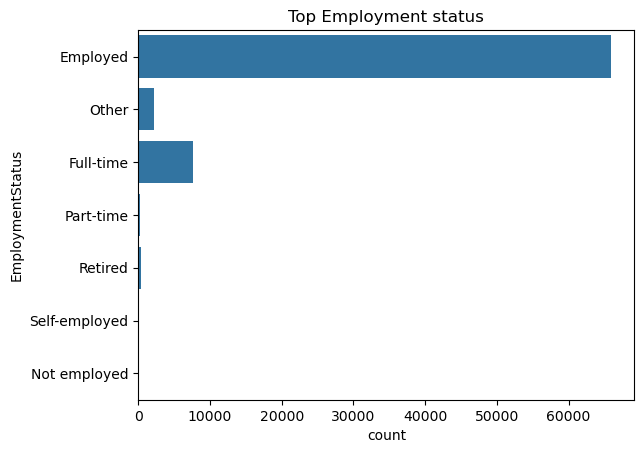

In [23]:
count_p('EmploymentStatus', base_color, 'Top Employment status')

> The employment status of borrowers range from Employed, other, Fulltime, Part-time, Retired, self-employed, not employed. As indicated by the chart, most borrowers are employed as at the time of listing with a little number(below 10000) of them indicating full-time, part-time, other, retired and so on.

### What range of income earners are listed for a loan?

In [24]:
#convert the 'IncomeRange' column into an order categorical type
IncomeRange= ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999',
              '$0', 'Not employed']
#Returns the Income Range with the categories and orderedness
IncomeRange = pd.api.types.CategoricalDtype(ordered=True, categories=IncomeRange)

Loan['IncomeRange'] = Loan['IncomeRange'].astype(IncomeRange);

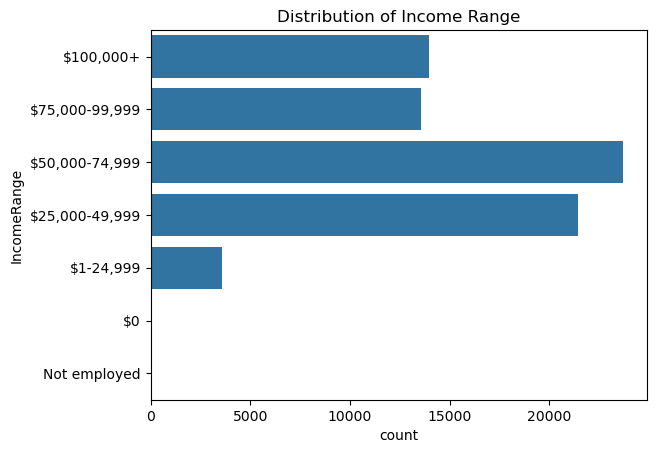

In [25]:
count_p('IncomeRange', base_color, 'Distribution of Income Range')

> From the distribution, it can be observed that the top 3 borrowers have an income range: `$50,000-74,999`, `$25,000-49,999` and `$100,000+`

### What is the ratio of loan debt to borrowers income?

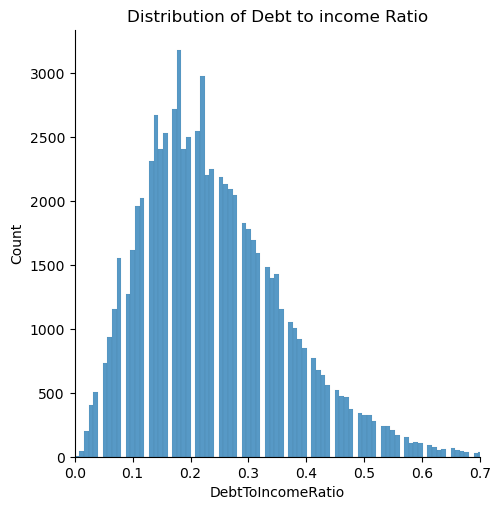

In [26]:
sns.displot(data= Loan, x= 'DebtToIncomeRatio', color=base_color)
plt.xlim(0, 0.7)
plt.title('Distribution of Debt to income Ratio');

> The debt to the income in percentage is given by the distribution, that is the debt in loan to the income of borrowers. It can be observed here that borrowers are more on the range inbetween 20% having a count of 3000 and above.

Now lets examing their occupation.
### What occupation types Request a Loan?

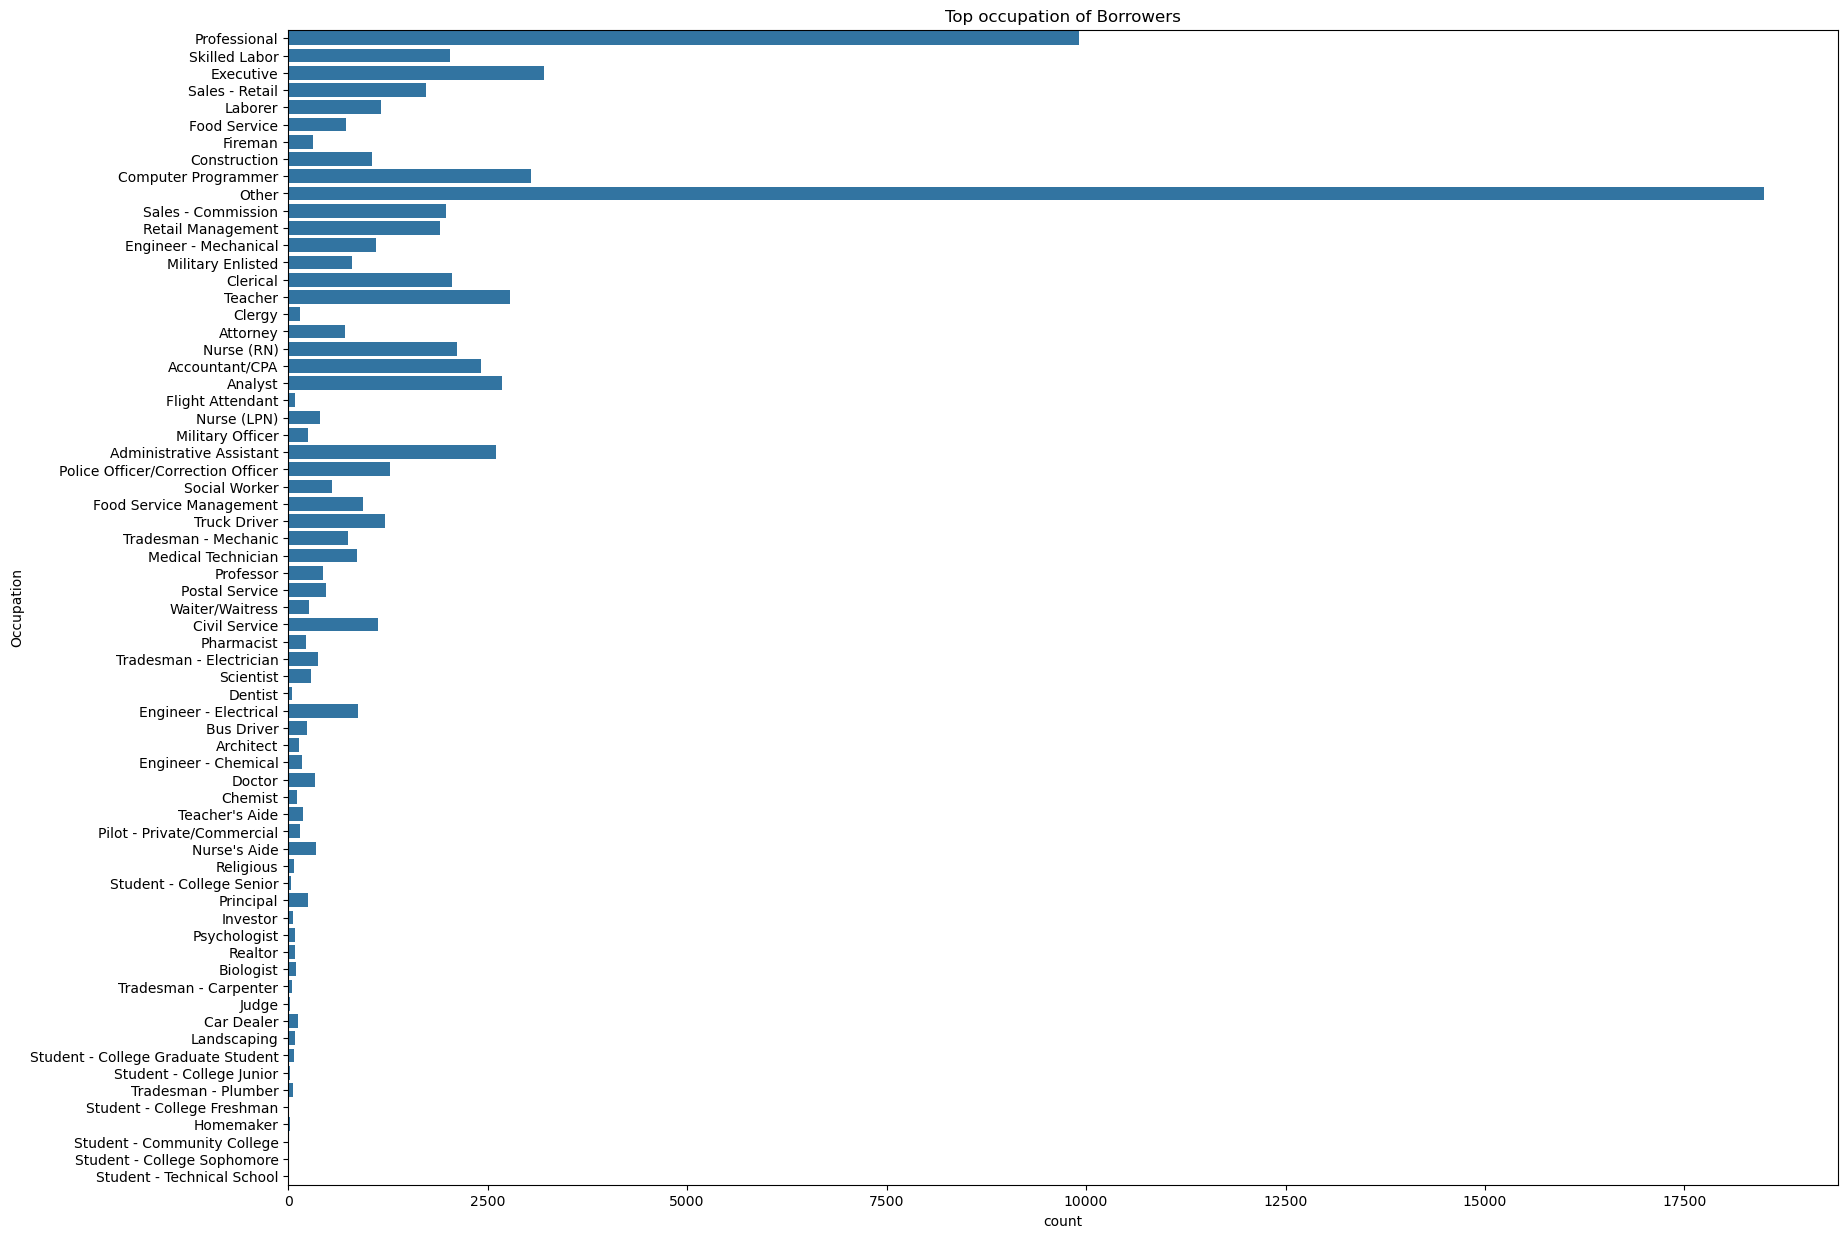

In [27]:
plt.figure(figsize= [20, 15])
count_p('Occupation', base_color, 'Top occupation of Borrowers')

> There a a whole lot of occupation types who request a loan, ranging from professions of different types to students of different clases. The top 5 howerver are Other, Professional, Executives, Computer Programmer, Teacher.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> *There are a few unusual features in this dataset like there borrowers who entered `$0` as their income. Other than that, the only change performed on the data is the deleting of rows were missing nan-values are present, so plots were made with subset of the data to ignore the missing values. Also, transformed the axis for few of the charts above.*  


## Bivariate Exploration

We will start off by examining the pairwise correlation present between features in the data.

In [28]:
numeric_vars = ['ListingCategory', 'BorrowerRate', 'BorrowerAPR', 'LenderYield', 'ProsperScore', 
                'Investors', 'DebtToIncomeRatio']
categoric_vars = ['ProsperRating','LoanStatus', 'Term', 'IncomeRange', 
                  'EmploymentStatus', 'BorrowerState', 'Occupation', 'IsBorrowerHomeowner']

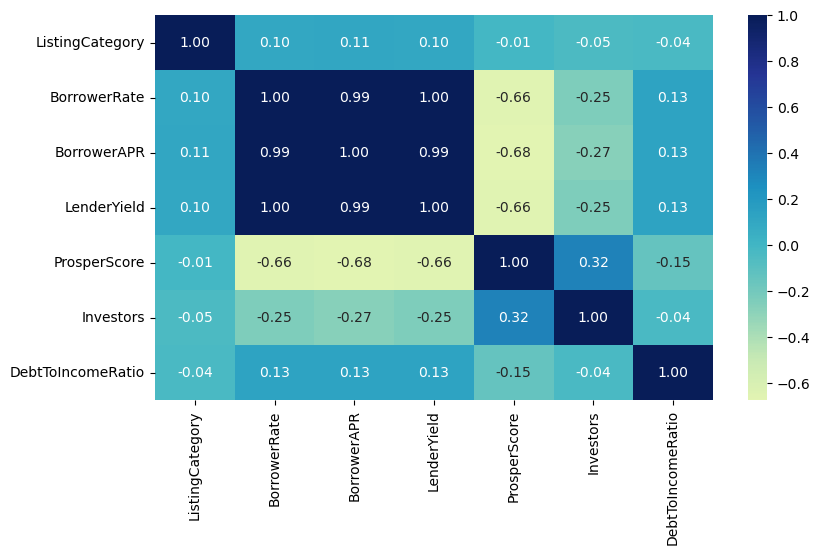

In [29]:
#correlation plot
plt.figure(figsize= [9, 5])
sns.heatmap(Loan[numeric_vars].corr(), annot = True, fmt = '.2f', cmap = 'YlGnBu', center = 0);
plt.show()

> *The matrix is simple yet it explains so much about the data. This is a quick glance at all the loan variables features of the data and their correlation with one another*

Loan_shape= (76224, 15)
Loan_samp= (300, 15)


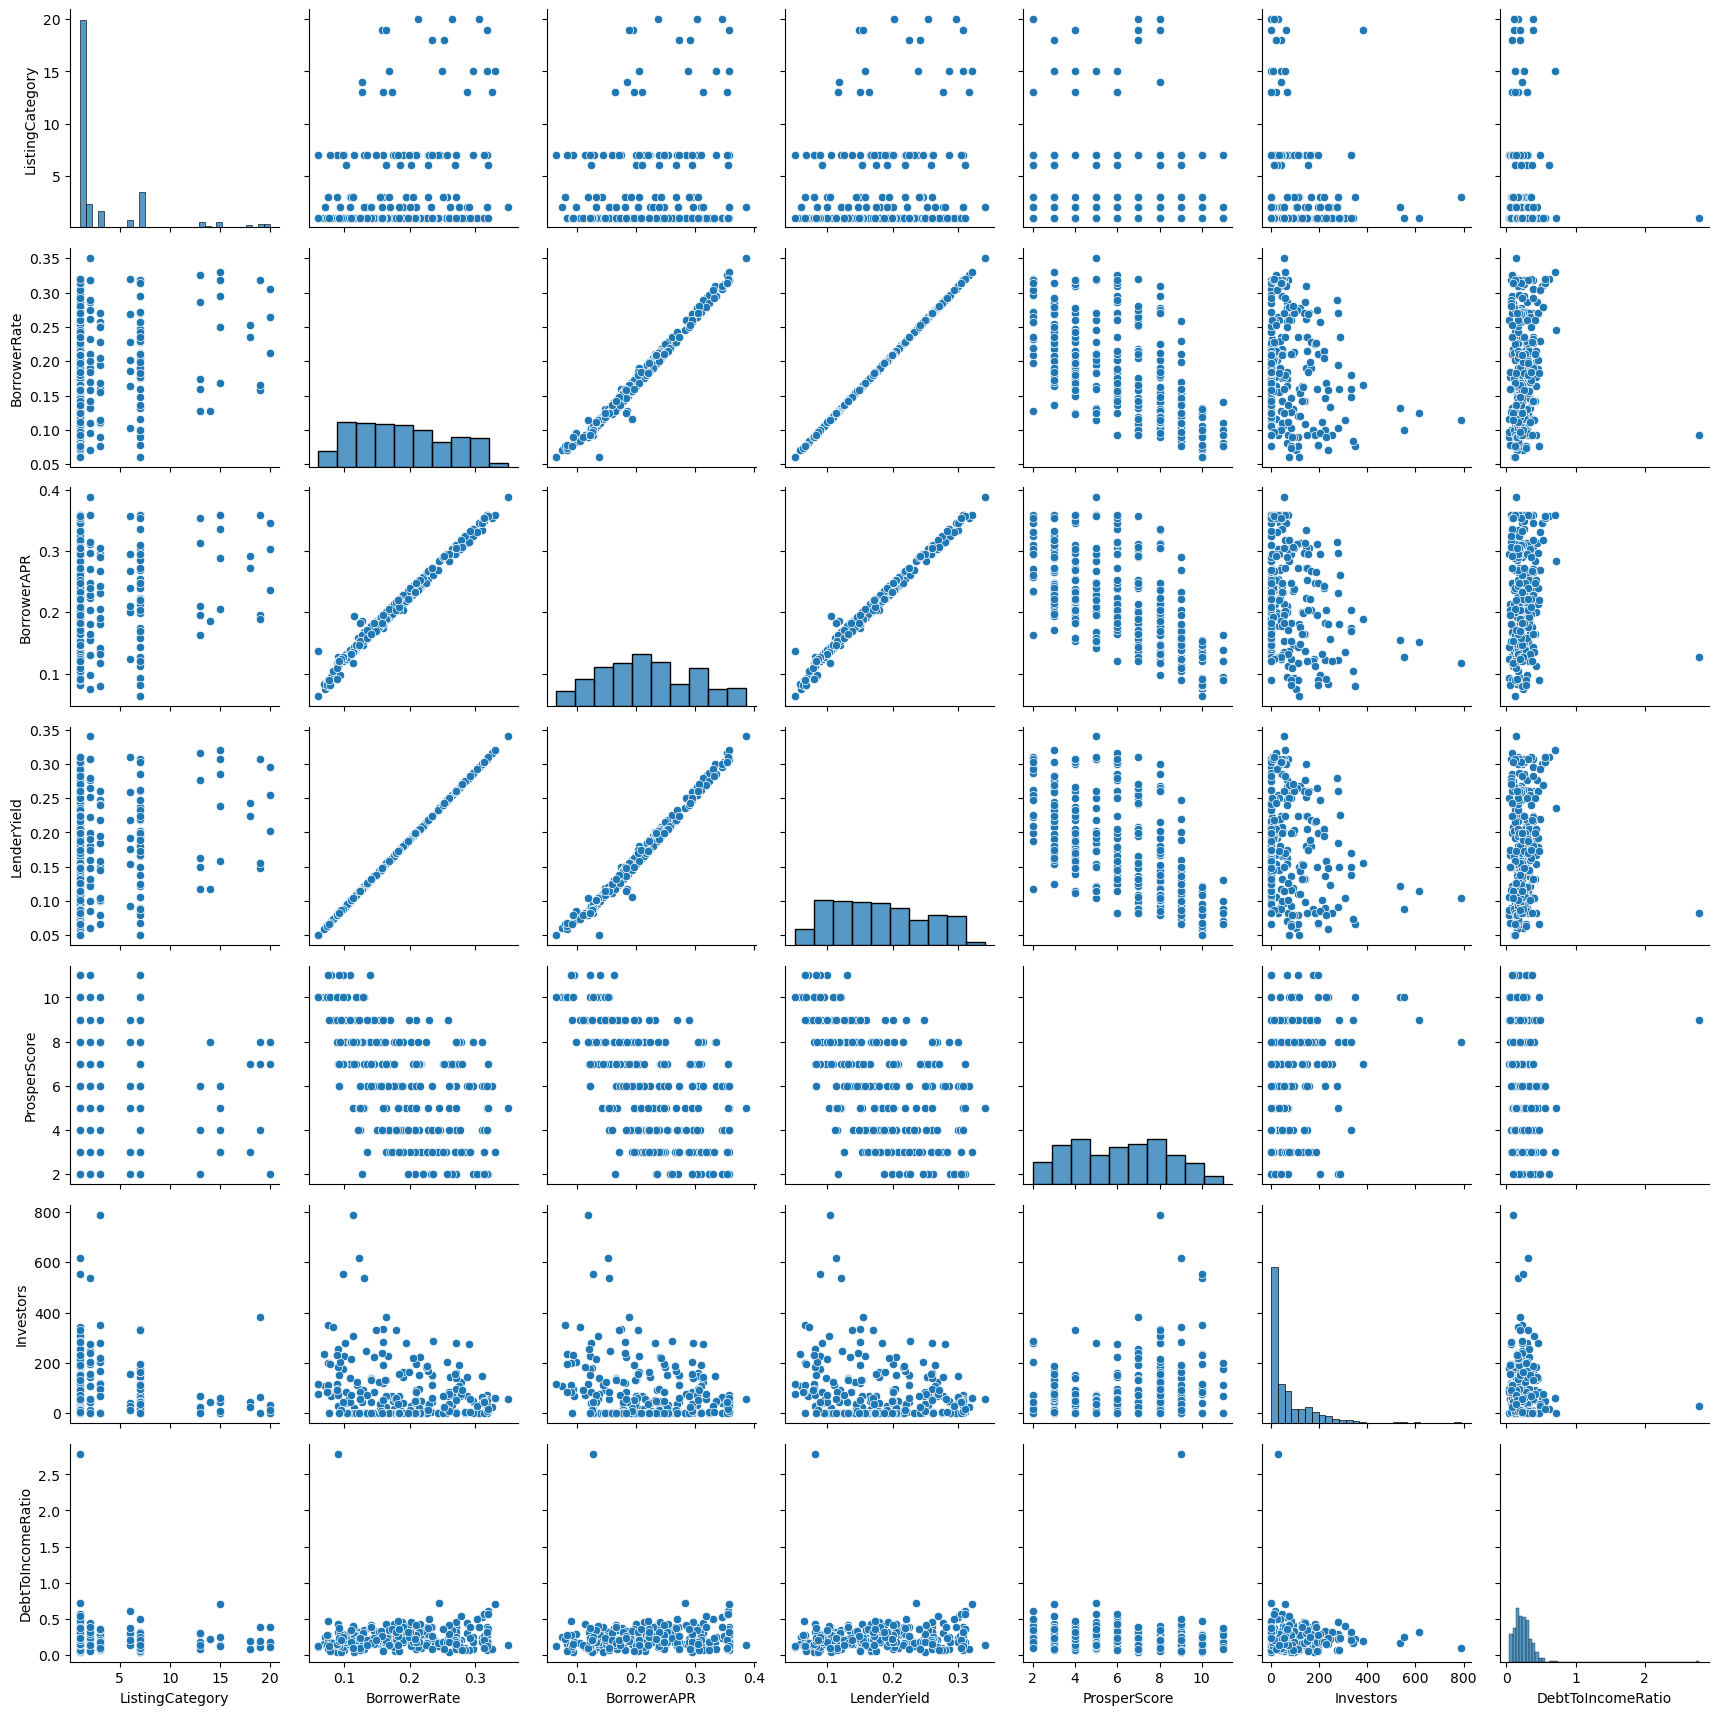

In [30]:
#plotting a matrix with sample 300 so plots are clearer and render faster
print('Loan_shape=', Loan.shape)
Loan_samp = Loan.sample(n=300, replace=False)
print('Loan_samp=', Loan_samp.shape)

g= sns.PairGrid(data = Loan_samp, vars= numeric_vars)
g = g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot);

> *As Shown, the term of loan is highly correlated to the the borrower rate, APR, lender yield and properscore as well as Loancurrent Days delinquent. Since the BorrowerRate, BorrowerAPR and LenderYield have little to no difference, it makes sense that they all move proportionally together.*

> *The borrowerAPR is highly correlated to LenderYield and borrowerRate which is to little surprise here due to their similarity in proportional distribution to Prosper Score.*

### What determines a Borrower Rate?

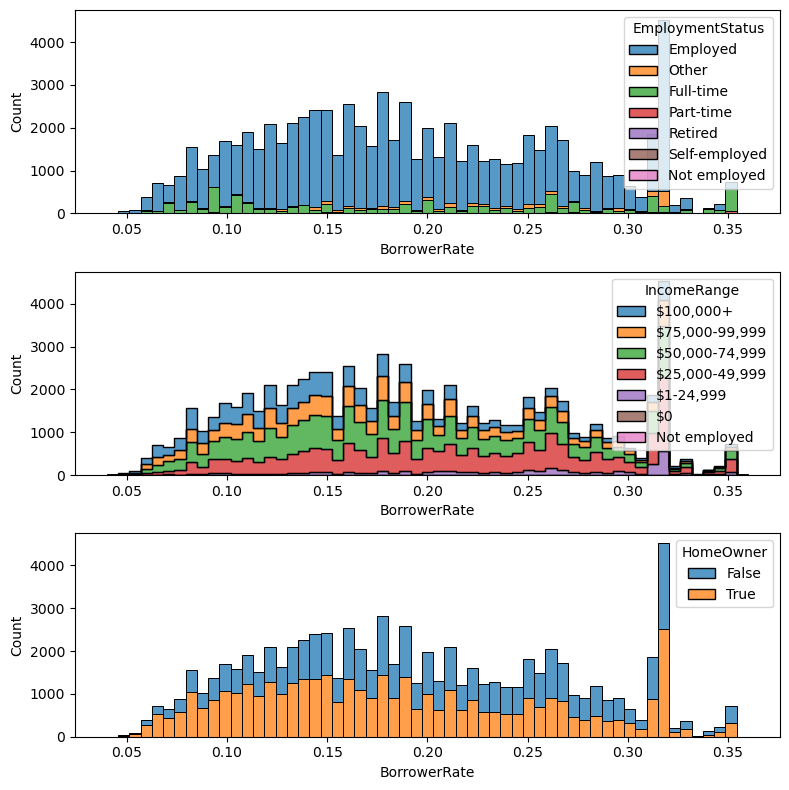

In [31]:
ax = plt.figure(figsize= [8, 8])
#plotting subplots: Layer1
plt.subplot(3, 1, 1)
sns.histplot(data= Loan, x= 'BorrowerRate', hue= 'EmploymentStatus', multiple= 'stack', 
             element='bars')

#plotting subplot, layer2
plt.subplot(3, 1, 2)
sns.histplot(data = Loan, x= 'BorrowerRate', hue='IncomeRange', multiple= 'stack', element='step')

#plot subplot layer 3
plt.subplot(3, 1, 3)
sns.histplot(data = Loan, x= 'BorrowerRate', hue= 'HomeOwner', multiple= 'stack', element='bars')
plt.tight_layout();

> From the above plots, 
> plot 1 shows clearly that most of the borrowers are employed. 
> For plot 2, the income is evenly distributed across the rate with no much correlation but particularly, rates are being given at 0.32 for all income range.
> The final plot shows that most borrowers do not own a home but it has little to no effect on the borrow rate.

### How does the Prosper rate determine a Borrowers rate?

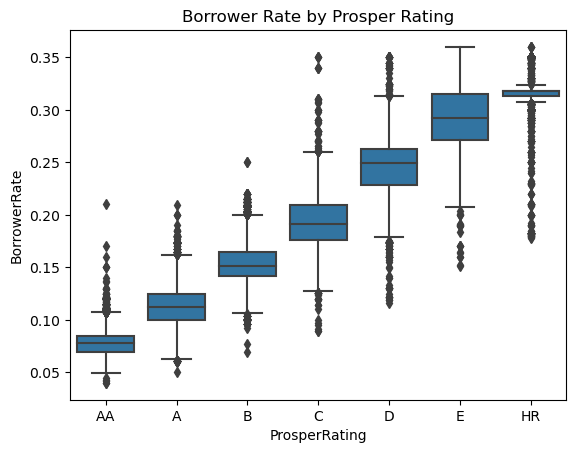

In [32]:
#convert the 'ProsperRating' column into an order categorical type
ProsperRate= ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
#Returns the ratings for prosper with the categories and orderedness
ProsperRatings = pd.api.types.CategoricalDtype(ordered=True, categories=ProsperRate)

Loan['ProsperRating'] = Loan['ProsperRating'].astype(ProsperRatings);

sns.boxplot(data= Loan, x= 'ProsperRating', y= 'BorrowerRate', color=base_color)
plt.title('Borrower Rate by Prosper Rating');


> *The rates is of a strong linear relationship. The high Prosper ratings have a lower borrower rate, i.e as the Propsper rating decreases, the borrow rate increases. otherwise known as a negative correlation. 

### Is Prosper Rating biased to Home owners?

In [33]:
#define a funtion to ease plotting task
def count_p2(var, title, hue):
    sns.countplot(data= Loan, x= var, hue=hue)
    plt.title(title)
    plt.xticks(rotation=65)
    plt.show()

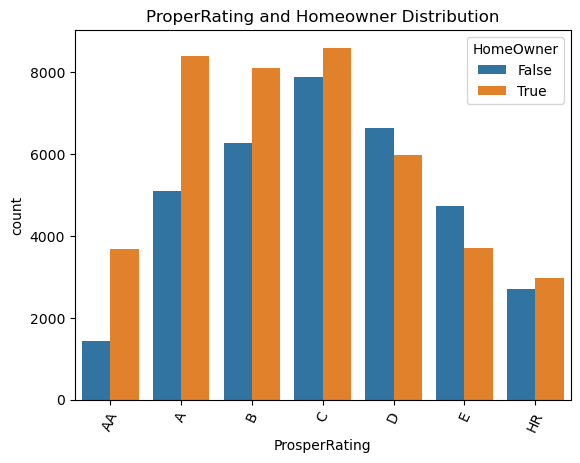

In [34]:
count_p2('ProsperRating', 'ProperRating and Homeowner Distribution', 'HomeOwner')

> The  Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA. 
> From the distribution, if a borrower is a home owner or not affects the the prosper rating score so yes, Prosper ratings are indeed biased to home owners. 
> As seen from class AA, A, B home owners are more in this category with C being a median point as there is just a slight difference between them. From D, E, HR there is an imbalance. 

### What Borrower Rate are Investors likely to follow?

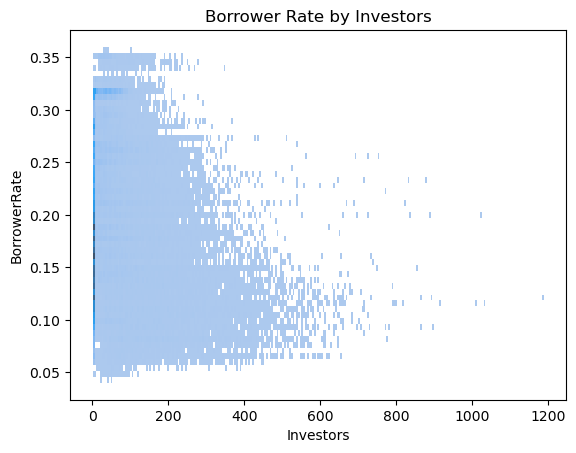

In [35]:
sns.histplot(data= Loan, x= 'Investors', y= "BorrowerRate")
plt.title('Borrower Rate by Investors');

> The Borrowers rate range from 0.05 to 0.35(%) and the investors go for the lower rate of 0.05 peaking at 1200 with 0.20 at 1000 and there tend to be a decline from that point.

### Is a Term of Loan affected by Borrowers Income?

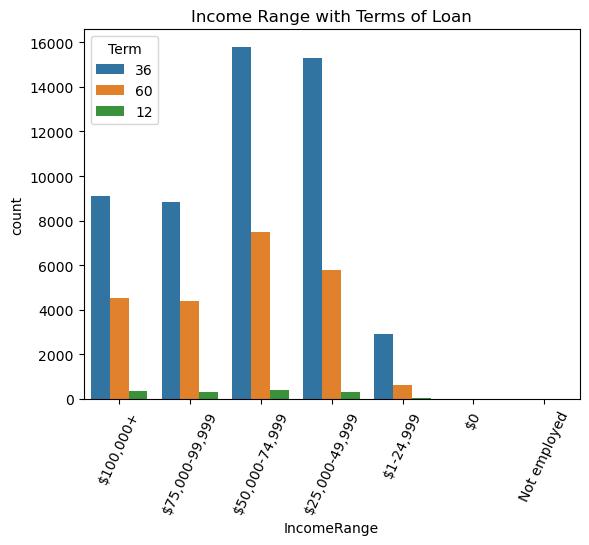

In [36]:
count_p2('IncomeRange', 'Income Range with Terms of Loan', "Term")

> Yes as shown it can be affected but not necessary so but more loans are granted for 36 months for the incomes range of `$50,000-74,999` & `$25,000-49,999` with 60 months approval for the highest income range the most to be granted.
> As shown by the plot, most of the Loan requested are for 36 months

### What is the rate imposed per annum as related to prosperscore distribution?

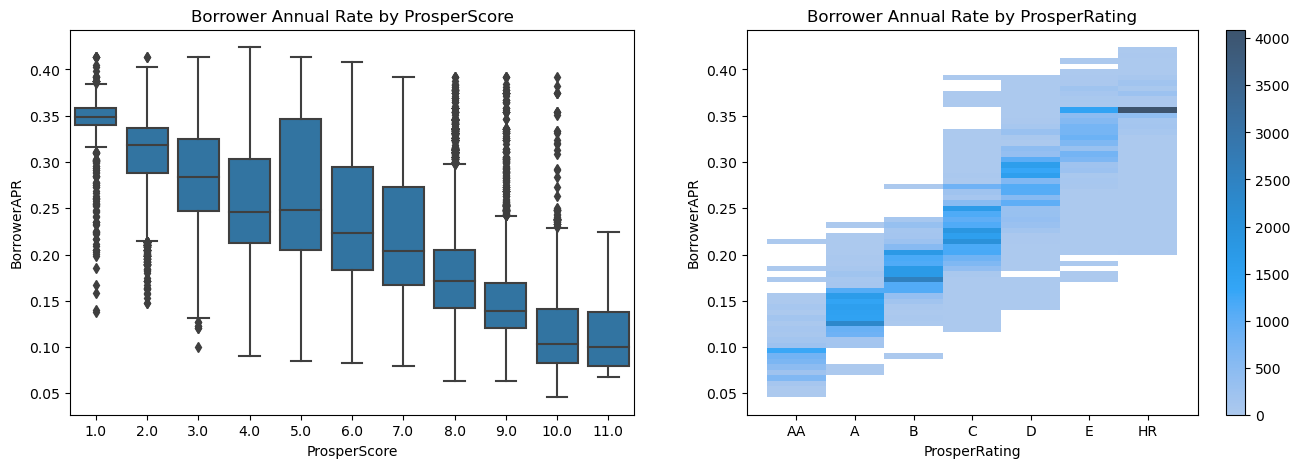

In [37]:
plt.figure(figsize= (16, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data= Loan, x= 'ProsperScore', y= 'BorrowerAPR', color=base_color)
plt.title('Borrower Annual Rate by ProsperScore')

plt.subplot(1, 2, 2)
sns.histplot(data= Loan, x= 'ProsperRating', y= 'BorrowerAPR', cbar=True)

plt.title('Borrower Annual Rate by ProsperRating');

> Reminder: The  Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA.
> It is a negative relation between the prosperscore and BorrowerAPR because as the score goes higher  the annual rate is reduced.

### What is the statistics of Debt To Income Ratio to the Income Range?

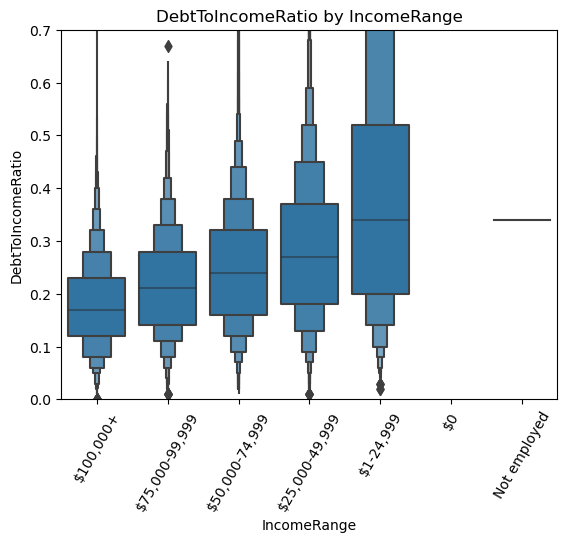

In [38]:
sns.boxenplot(data= Loan, x= 'IncomeRange', y= 'DebtToIncomeRatio', color=base_color)
plt.ylim(0, 0.7)
plt.xticks(rotation=60)
plt.title('DebtToIncomeRatio by IncomeRange');

> From the plot we can cearly see that the income Range of `$100k+ has the least median and as the income decreases, the debt to income increases in median. Hence, increase in debt to income ratio.

### Do Investors invest base off the Prosperscore?

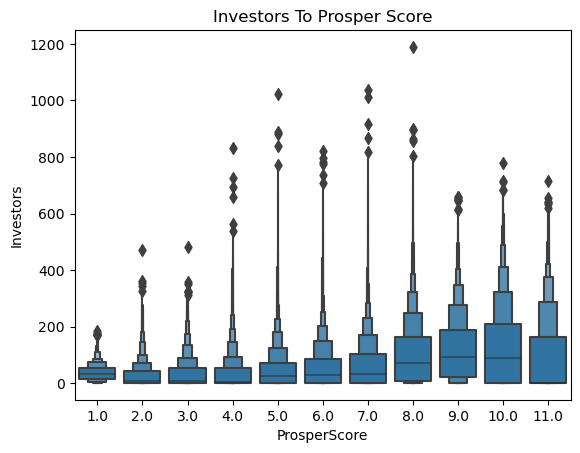

In [39]:
sns.boxenplot(data= Loan, x= 'ProsperScore', y= 'Investors', color= base_color)
plt.title('Investors To Prosper Score');

> There is a positive correlation betwen the investor and Prosper score. The higher the Prosperscore the more investors invest as the boxenplot distribution shows the median increase

### What is the difference between the Borrower Rate and LenderYield?

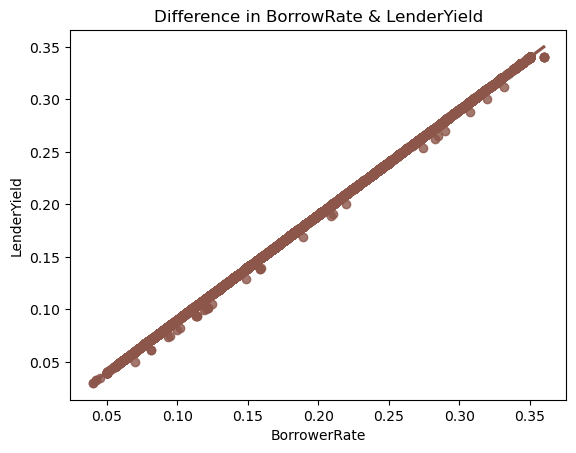

In [40]:
#set the color
color1= sns.color_palette()[5]
#plot to investigate difference
sns.regplot(data= Loan, x= 'BorrowerRate', y='LenderYield', color=color1)
plt.title('Difference in BorrowRate & LenderYield');

> *The lenderYield is strongly correlated with the Borrower rate. As the borrower rate increases, the lendyield also increases but as the lenderYield is rate less the service fee and borrower rate is just the interest rate, it can be seen that their points has a slight difference in position which indicates the low difference in between the 'interest' rate and 'servicing fee'*

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> *My feature of interest was borrower rate and it showed a stong relation to the  Prosper Rating as well as the prosper score. It appears so, that the borrowers with good to best prosper rating get lower percentage rate and vice versa.*

> *The features of interest did not vary so much to other features like the Lender Yield and Borrower Apr ploted againt the Propers score/Rating had a similar trend to Borrower Rate with Proper rate.*

> *Another is the borrower apr against the prosper score. although the plots show a downward trend it is not different from the borrower rate to prosper ratings.*

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> One feature of interest is the lender yield against borrower rate shows a strong correlation and with the plot we can see some outliars which are the difference between the rate and the service charge.

>  Also, the ProsperRating in a clustered chart with Homeowners shows biasness when rating customers. Its quite interesting as your rating on prosper scale do depend on if you own a home or not, amongst other factors.

## Multivariate Exploration

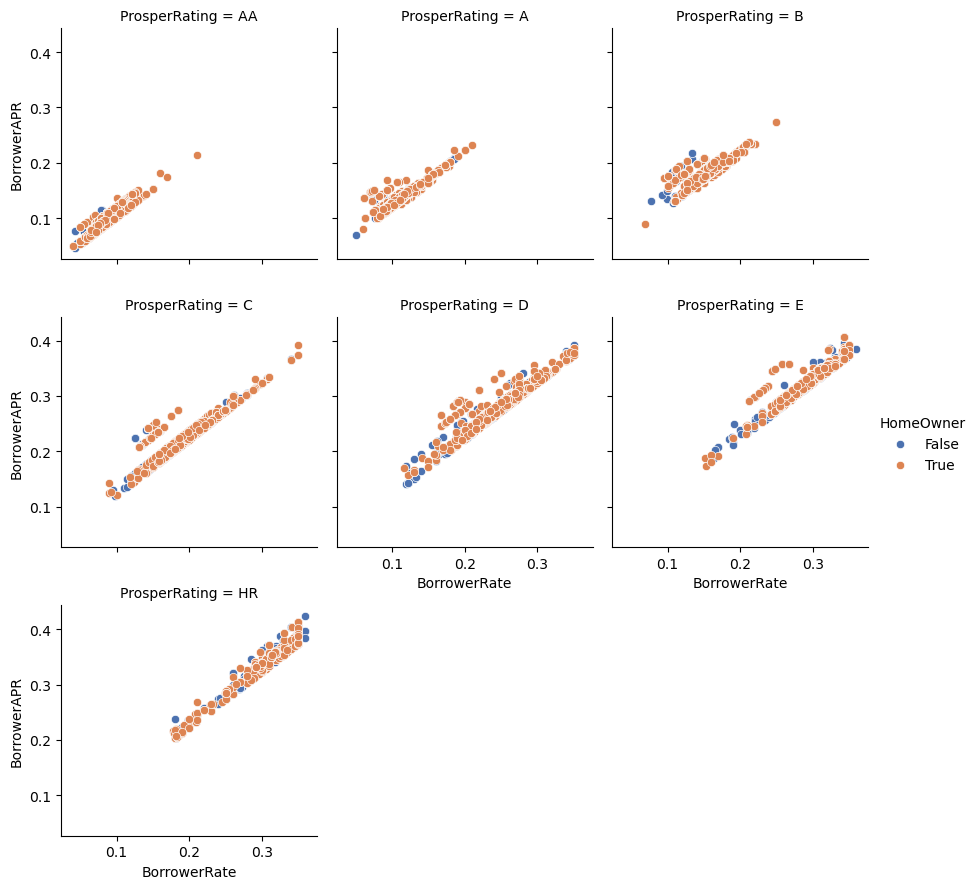

In [41]:
#Plot a facetgrid that distribute the data by the Prosper Ratings
g= sns.FacetGrid(data=Loan, col='ProsperRating', hue='HomeOwner', height=3, col_wrap=3, 
                 palette="deep")
g.map(sns.scatterplot, "BorrowerRate", "BorrowerAPR")
g.add_legend();

> **The  Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA.**
> This is a plot of BorrowerAPR to borrowerRate. They have a proportional movement to each other.
> Adapting the Facegrid here due to overplotting. It can be observed that there don't seem to be any obvious differences in the main cluster across Prsper Ratings, except that the rates AA, A and B arcs are shorter than the other classes due to lower interest rate. The faceted plots clearly show that most of the borrowers with high interest rates have prosper ratings C, D, E, & HR.
> Also if borrower is a home owner or not, the plot clearly shows a more saturation on home owners(True) for prosper rating's AA, A, B and the reverse from D, E, HR with C being sort of a middle point

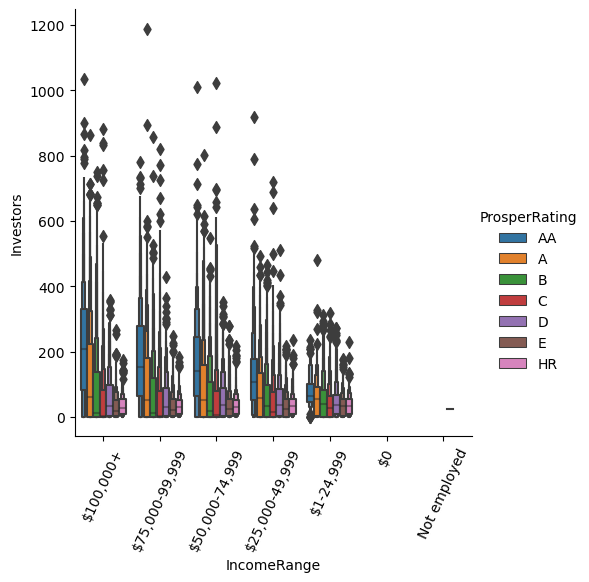

In [42]:
#to show why more investors invest in some loans than in others
#plot a facetgrid to indicte the distribution 
sns.catplot(data= Loan, y= "Investors", x= "IncomeRange", hue="ProsperRating", kind="boxen")
#set the ticks to dipict well the label
plt.xticks(rotation=65)
sns.despine();

>**The  Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA.**

> The Faceted plot clearly identify that investors take to account the income and prosper rates as more investors are likely to invest on loans with high income earners as well as good to great prosper ratings. The income range and proper rating are not dependent on each other but the investors who invest in loans depend on both the incomee range and prosper rating as the plot shows a decrease in investors as the income and Prosper rating decrease. This is a POSITIVE CORELATION.

**Adapting the Bivariate exploration, we now want to see the how the Borrower Rate is influenced**

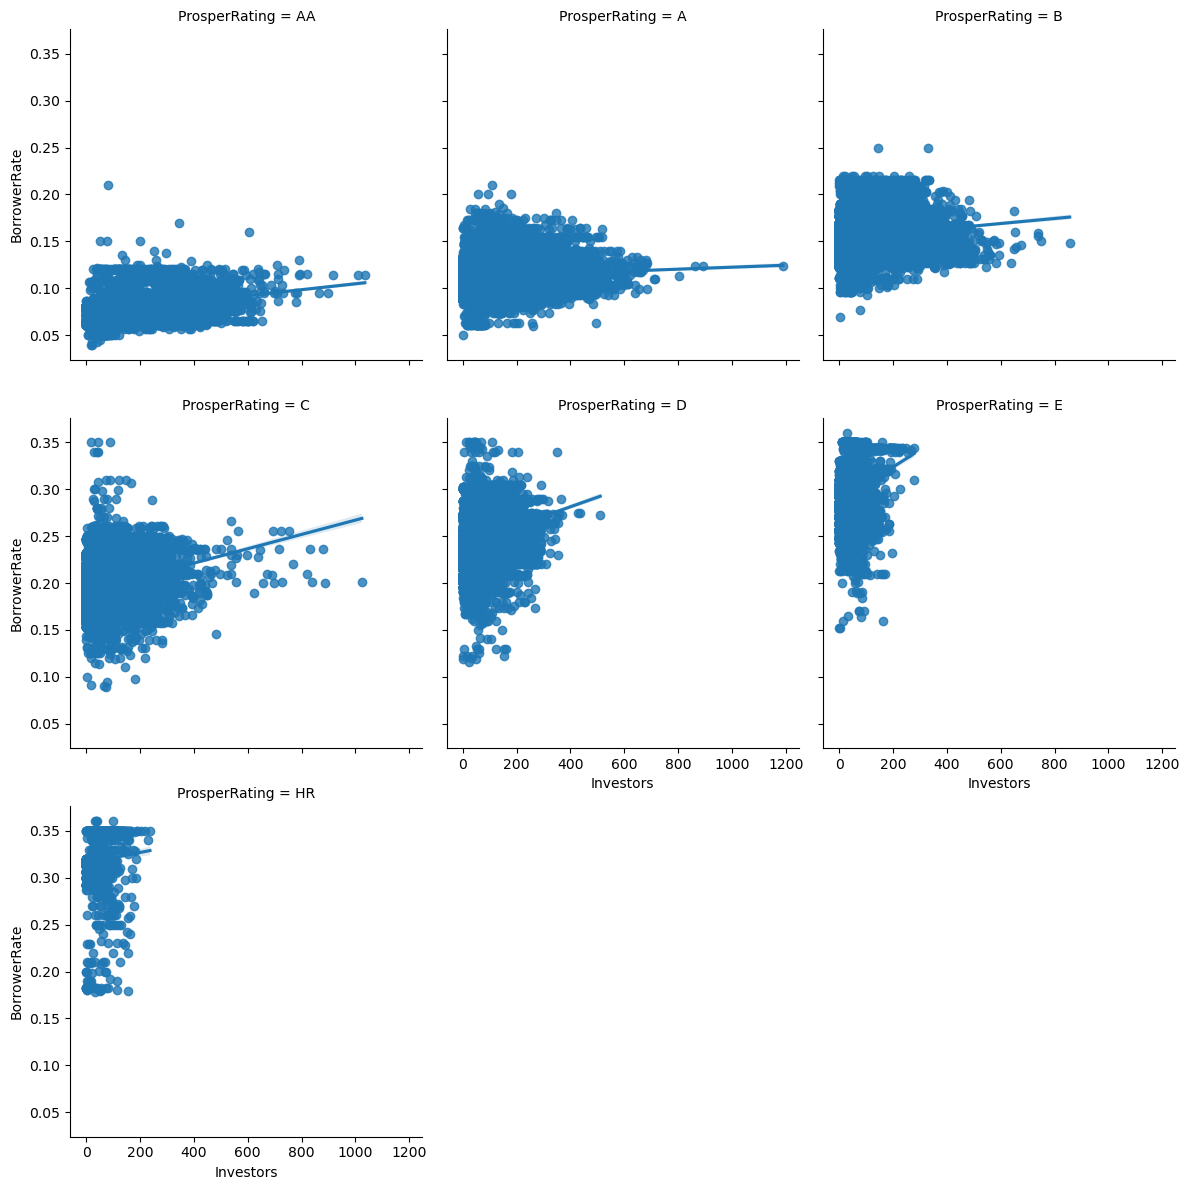

In [43]:
sns.lmplot(data = Loan, x= 'Investors', y= 'BorrowerRate', col= 'ProsperRating', col_wrap=3, 
           height=4, x_jitter=0.5);

> The regression line best explains the data points and it tells us here that the the line fits best on the rating AA, A, B and C with rating A having the most investors and it is worth noting also that the borrower rates are lower for these rates wheres with less investors for prosper ratings D, E, HR; it could be seen why rates are higher. 

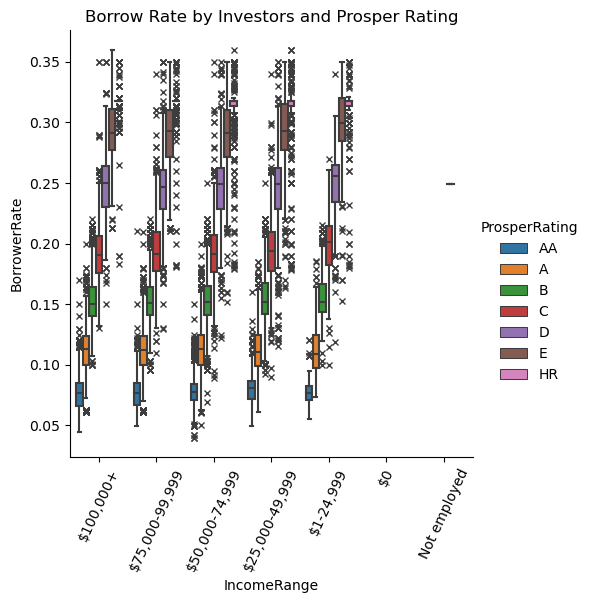

In [44]:
sns.catplot(data= Loan, x= 'IncomeRange', y= 'BorrowerRate', hue='ProsperRating', kind="box", 
            flierprops={"marker": "x"})
plt.xticks(rotation=65)
plt.title("Borrow Rate by Investors and Prosper Rating");

> The distribution of boxes across the chart taking to account the hue parameter, shows us that the income range is affected by the rate given on loans. The quartiles explains to us that the median, min and max points take a range according to Prosper rating which can be best expresssed as; 'the better the income range / Prosper Rating the lower rate on loans and vice versa. 

>Although it should be noted and as the plot shows that the prosper Ratings do not depend on the income range of customers.

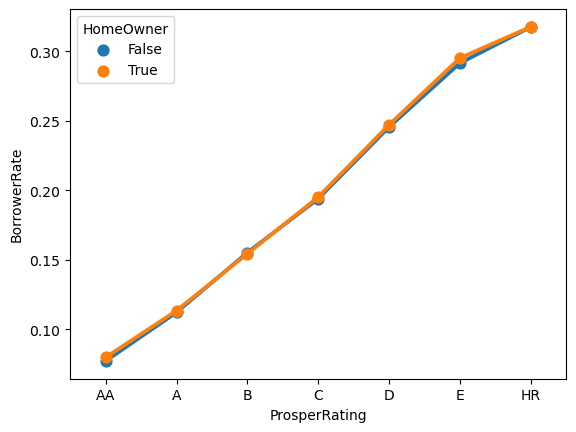

In [45]:
#Plotting a multivariate barplot
sns.pointplot(data= Loan, x="ProsperRating", y="BorrowerRate", hue="HomeOwner");

>From the distribution, is clear that the borrower rate is affected by how they are rated on the Prosper scale but not so much on the home owner effects. it is distributed evenly across points of the borrower rate.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The relation between the income range, investors and Prosper rating, strenghtens each other because this way we are able to detect why more investors are likely to invest on loans. The investors and Proper rating being 2 of 3 of the features of interest in this analysis it strenghtens well with the income range of the borrowers

### Were there any interesting or surprising interactions between features?

> looking back at the barplot, the relation between the 3 features here is quite interesting as they are very much correlated and dependent on each other of some sort. BorrowerRate > ProsperRating > HomeOwner

### Conclusions
> *We used Univeriate, Bivariate and Multivariate analysis for understanding Proper Loan Data. The data set consisted of 113937 rows and 81 columns. We took some features of interest which ultimate trimmed the data to 15 variable features on the columns. The dataset consisted of both categorical and numerical variables with the latter being the most; we incorporated a histogram and bar chart to explore the data in the univariate, scatterplot and boxplot for bivariate analysis and reflected upon some interesting as well as unusual features. A scatter plot and barplot was used in multivariate analysis to derive interesting relationships which we will Ennumerate on.

> The data included 15 columns and 76224 rows after wrangling the data to remove missing values. Most of the variables selected showed corelation to the ProsperRating. Propsper Rating are Ratings(AA-best to HR- worst) given to the borrowers on their loan which is based off various factors. Good rating borrowers tend to have good income range, lower APR and borrow rates, and could borrow bigger loan amounts, they were generally safer bet, so most of the investors invested in them.  
